In [11]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [12]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
from IPython import display
import imageio as iio
import numpy as np
import scipy.ndimage

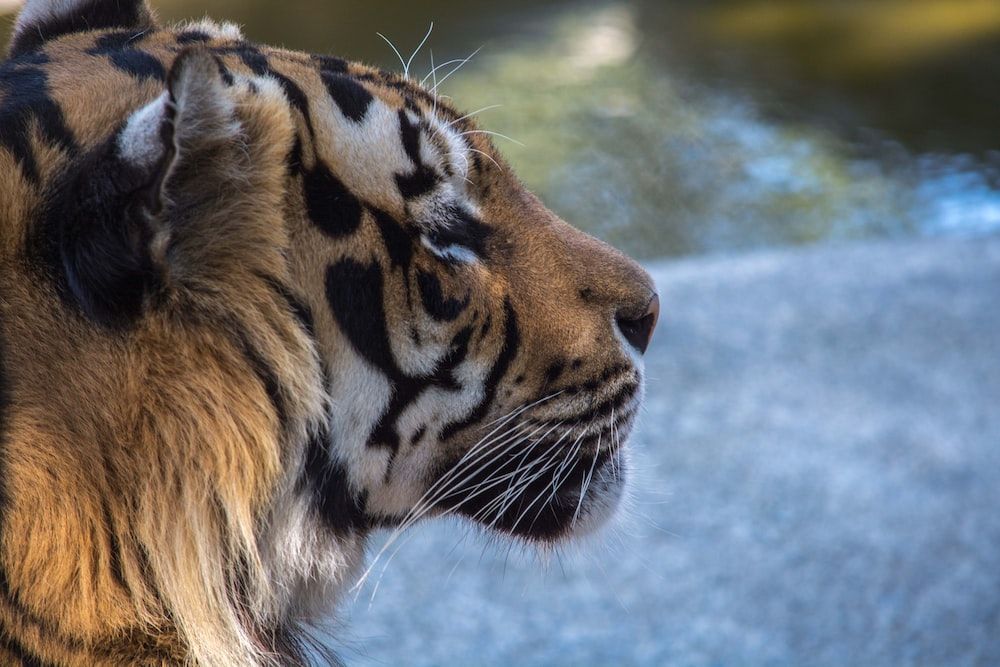

In [13]:
image=display.Image("Tiger.jpeg")
image

In [14]:
# read an image
image = iio.imread('Tiger.jpeg')
 
# print shape of the image
print(image.shape)

(667, 1000, 3)


In [15]:
# Make the image Black and White using the formula Y= 0.299*R + 0.587*G + 0.114*B i.e. applying greyscale

def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

greyscale_image = grayscaleimg(image)

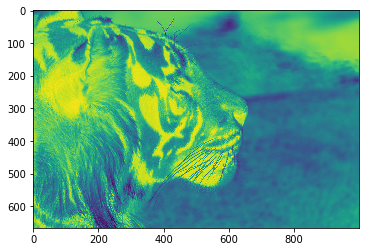

In [16]:
#Invert the image by subtracting it from 255
inv_img = (255 - greyscale_image)
plt.imshow(inv_img)

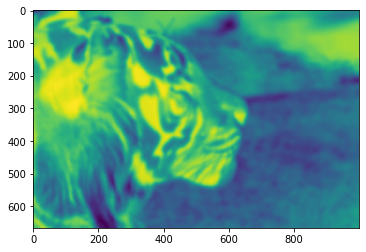

In [17]:
#Blur the image using gaussian filter
blurr_image = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurr_image)

In [18]:
#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blurr_image, greyscale_image):
    resultant_dodge=blurr_image*255/(255-greyscale_image) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[greyscale_image==255]=255
    return resultant_dodge.astype('uint8')

In [19]:
#Generate the target image by applying the dodge
Sketch= dodging(blurr_image,greyscale_image)

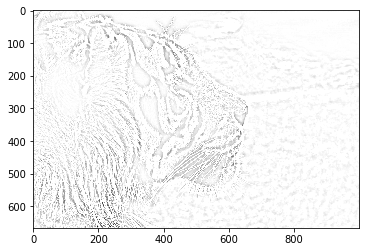

In [20]:
#Display the target image
plt.imshow(Sketch, cmap="gray")

In [21]:
#Save the image
plt.imsave('Tiger Sketch.png', target_img, cmap='gray', vmin=0, vmax=255)